<a href="https://colab.research.google.com/github/anirudh-data-science/DataScience_Projects/blob/Capstone_Project/jupyter_labs_eda_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Assignment: Exploring and Preparing Data


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering


----


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab



In [1]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [16]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


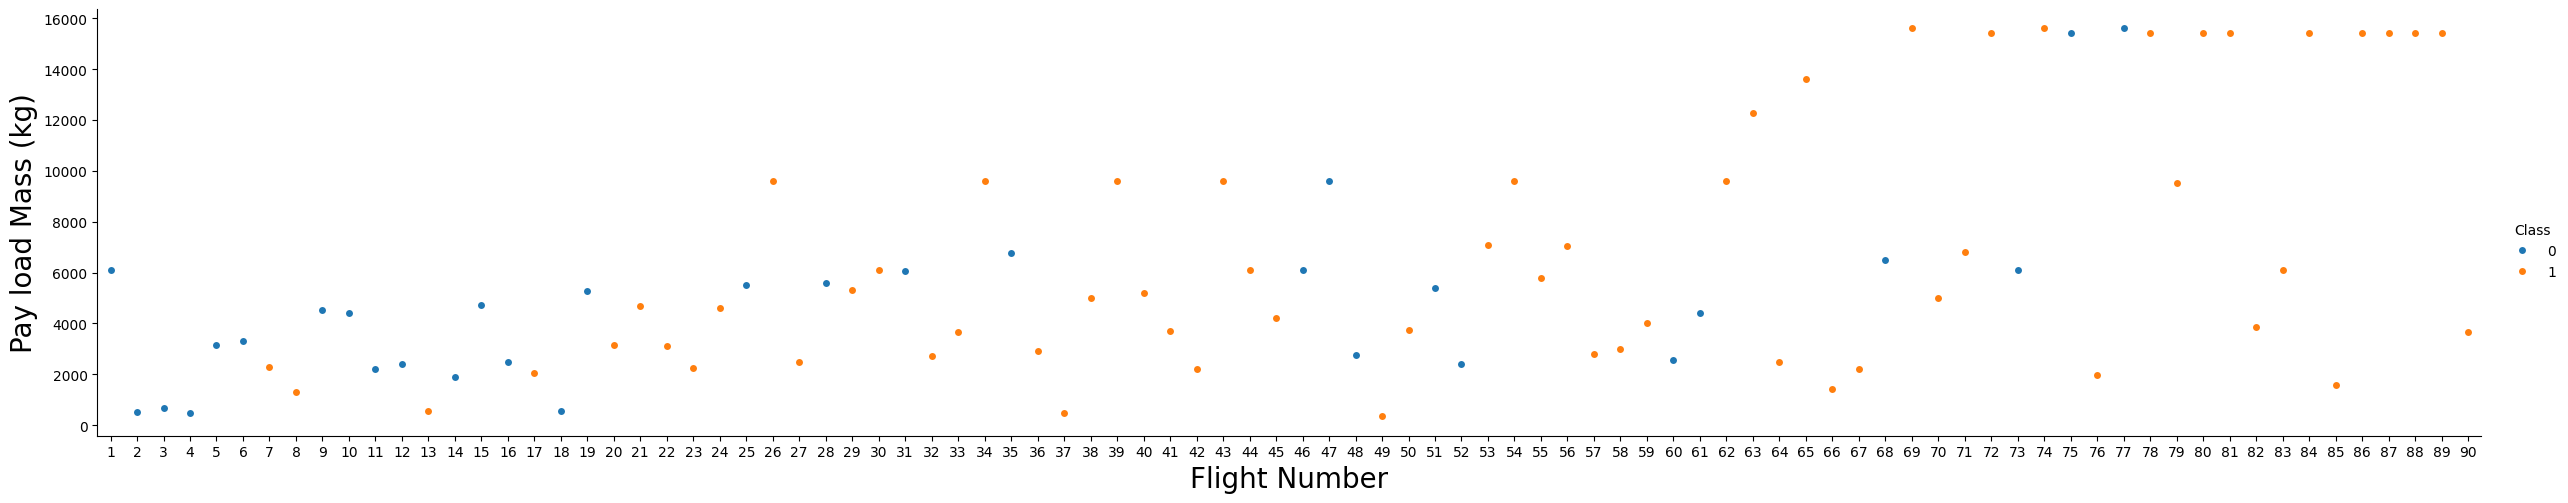

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


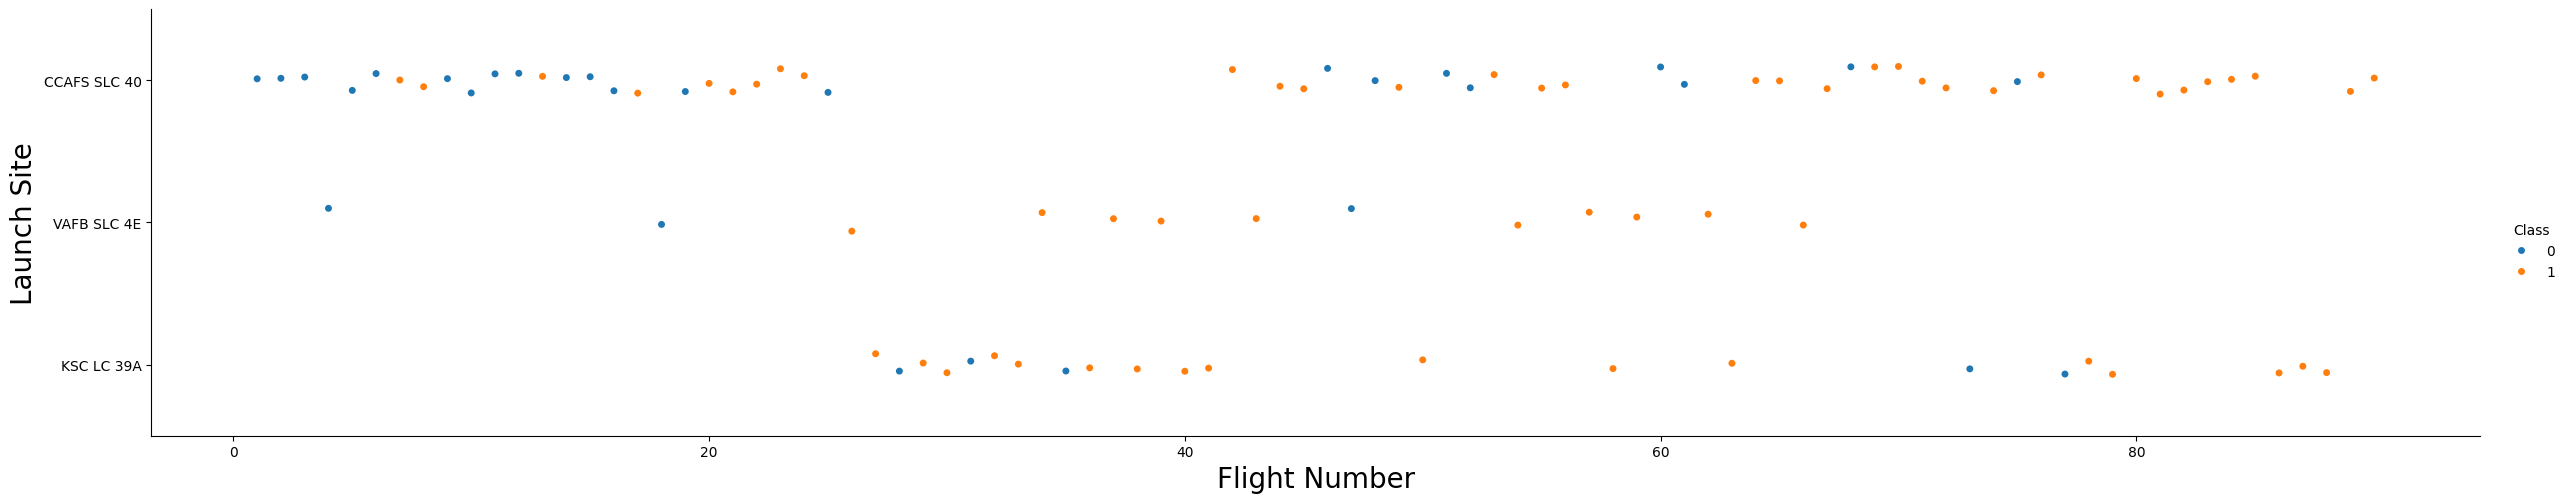

In [4]:
sns.catplot(
    x="FlightNumber",  # Set FlightNumber on the x-axis
    y="LaunchSite",    # Set LaunchSite on the y-axis
    hue="Class",       # Use 'Class' as the hue variable
    data=df,            # Data to plot from the dataframe
    aspect=5           # Adjust plot aspect ratio (optional)
)

plt.xlabel("Flight Number", fontsize=20)  # Label the x-axis
plt.ylabel("Launch Site", fontsize=20)   # Label the y-axis
plt.show()                                # Display the plot


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


In [5]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


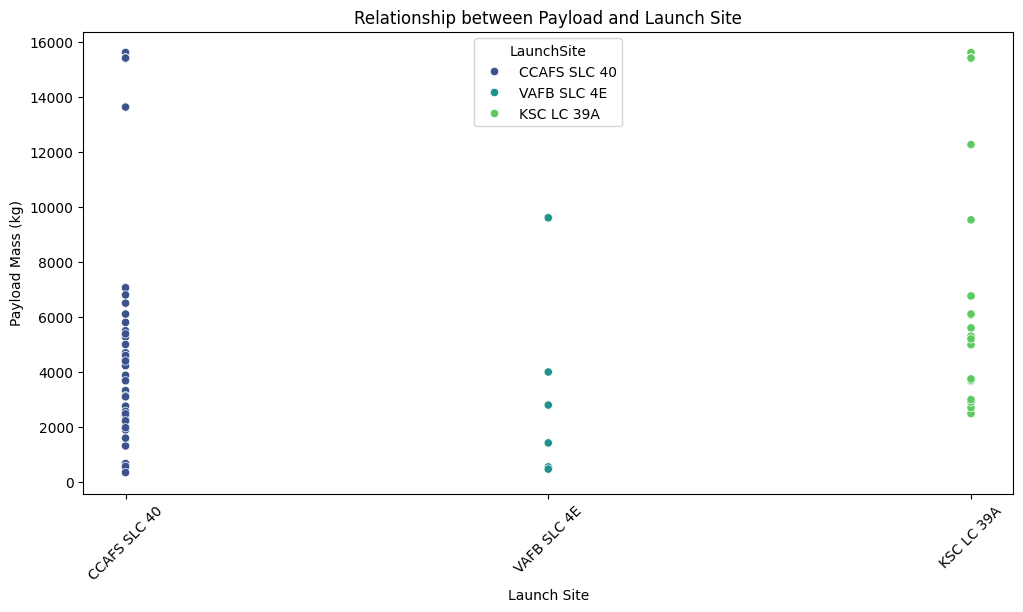

In [6]:
# Select relevant data for the plot
plot_data = df[['LaunchSite', 'PayloadMass']]

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LaunchSite', y='PayloadMass', data=plot_data, hue='LaunchSite', palette='viridis')
plt.title('Relationship between Payload and Launch Site')
plt.xlabel('Launch Site')
plt.ylabel('Payload Mass (kg)')
plt.xticks(rotation=45)
plt.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [8]:
# Using unique() method to get an array of unique values
unique_values_array = df['Orbit'].unique()
print("Unique Values using unique():", unique_values_array)

# Using value_counts() method to get a count of each unique value
value_counts = df['Orbit'].value_counts()
print("Value Counts using value_counts():\n", value_counts)

Unique Values using unique(): ['LEO' 'ISS' 'PO' 'GTO' 'ES-L1' 'SSO' 'HEO' 'MEO' 'VLEO' 'SO' 'GEO']
Value Counts using value_counts():
 GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64


<ipython-input-19-abd99f8de480>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Orbit']).mean()['Class'].plot(kind='bar', title="Success rate for each orbit", width=0.75,


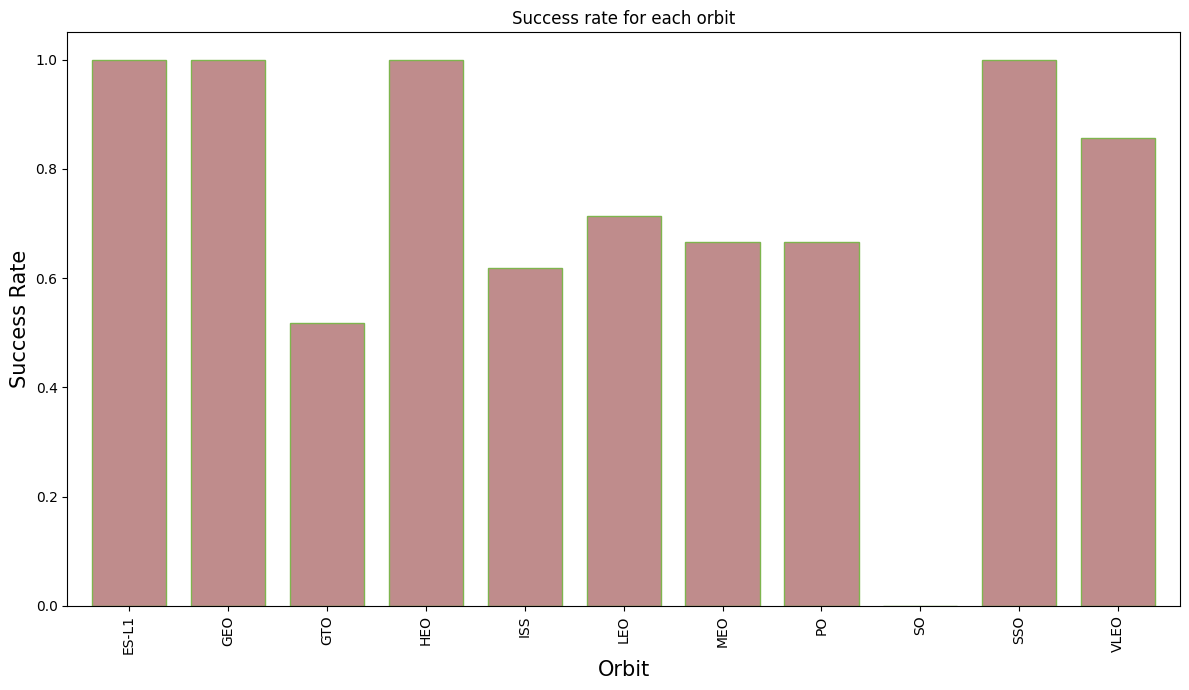

In [19]:
df.groupby(['Orbit']).mean()['Class'].plot(kind='bar', title="Success rate for each orbit", width=0.75,
                                           figsize=(12, 7), color=(0.5, 0.1, 0.1, 0.5), edgecolor = '#7eb54e')
plt.xlabel("Orbit",fontsize=15)
plt.ylabel("Success Rate",fontsize=15)
plt.tight_layout()
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


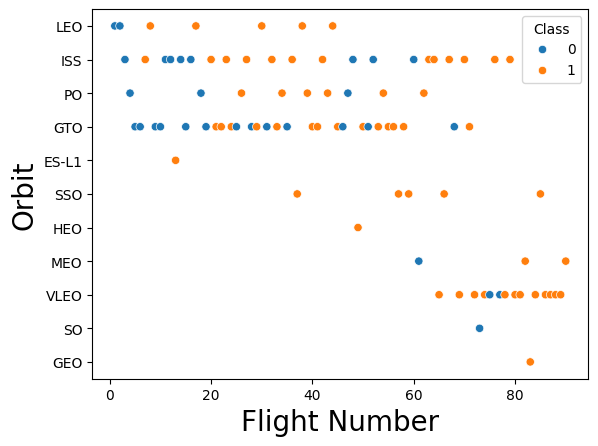

In [ ]:
sns.scatterplot(
    x="FlightNumber",  # Set FlightNumber on the x-axis
    y="Orbit",         # Set Orbit on the y-axis
    hue="Class",       # Use 'Class' as the hue variable
    data=df            # Data to plot from the dataframe
)

plt.xlabel("Flight Number", fontsize=20)  # Label the x-axis
plt.ylabel("Orbit", fontsize=20)         # Label the y-axis
plt.show()                                # Display the plot

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


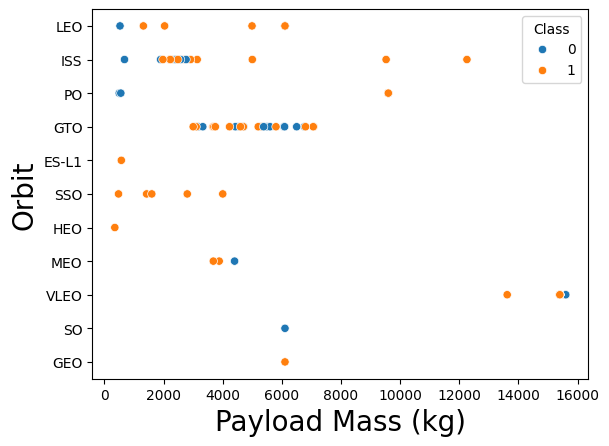

In [ ]:
sns.scatterplot(
    x="PayloadMass",  # Set PayloadMass on the x-axis
    y="Orbit",         # Set Orbit on the y-axis
    hue="Class",       # Use 'Class' as the hue variable
    data=df,            # Data to plot from the dataframe
)

plt.xlabel("Payload Mass (kg)", fontsize=20)  # Label the x-axis
plt.ylabel("Orbit", fontsize=20)         # Label the y-axis
plt.show()                                # Display the plot

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


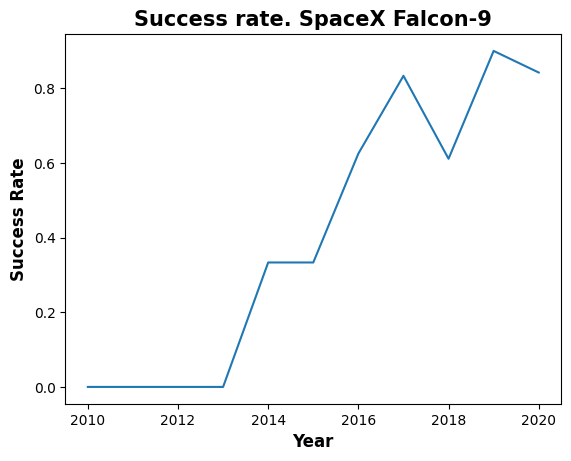

In [21]:
# A function to Extract years from the date
def Extract_year(date):
    return date.split("-")[0]

# Apply the Extract_year function to create a new 'Year' column
df['Year'] = df['Date'].apply(Extract_year).astype('int')

# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(x=df['Year'].unique(), y=df.groupby(['Year'])['Class'].mean())

plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Success Rate", fontsize=12, fontweight='bold')
plt.title("Success rate. SpaceX Falcon-9", fontsize=15, fontweight='bold')
plt.show()


In [22]:
# Apply the Extract_year function to create a new 'Year' column
df['Year'] = df['Date'].apply(Extract_year).astype('int')

# Calculate success rate each year
success_rate_per_year = df.groupby('Year')['Class'].mean()

# Display success rate in tabular form
success_rate_table = pd.DataFrame({
    'Year': success_rate_per_year.index,
    'Success Rate': success_rate_per_year.values
})

print(success_rate_table)

   Year  Success Rate
0  2010      0.000000
1  2012      0.000000
2  2013      0.000000
3  2014      0.333333
4  2015      0.333333
5  2016      0.625000
6  2017      0.833333
7  2018      0.611111
8  2019      0.900000
9  2020      0.842105


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# Create dummy variables for categorical columns
features_one_hot = pd.get_dummies(df, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the result DataFrame, including all features
print(features_one_hot.head())


   FlightNumber        Date BoosterVersion  PayloadMass      Outcome  Flights  \
0             1  2010-06-04       Falcon 9  6104.959412    None None        1   
1             2  2012-05-22       Falcon 9   525.000000    None None        1   
2             3  2013-03-01       Falcon 9   677.000000    None None        1   
3             4  2013-09-29       Falcon 9   500.000000  False Ocean        1   
4             5  2013-12-03       Falcon 9  3170.000000    None None        1   

   GridFins  Reused   Legs  Block  ...  Serial_B1048  Serial_B1049  \
0     False   False  False    1.0  ...             0             0   
1     False   False  False    1.0  ...             0             0   
2     False   False  False    1.0  ...             0             0   
3     False   False  False    1.0  ...             0             0   
4     False   False  False    1.0  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0  

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# Get the numeric columns
numeric_columns = features_one_hot.select_dtypes(include=['number']).columns

# Cast the numeric columns to float64
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

# Display the updated DataFrame
print(features_one_hot.dtypes)

FlightNumber      float64
Date               object
BoosterVersion     object
PayloadMass       float64
Outcome            object
                   ...   
Serial_B1056      float64
Serial_B1058      float64
Serial_B1059      float64
Serial_B1060      float64
Serial_B1062      float64
Length: 87, dtype: object


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)